In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 50)

In [2]:
start_date = '2018-01-01 00:00:00'

In [3]:
end_date = '2019-10-30 23:00:00'

### Spot Price

In [4]:
df_price = pd.read_csv('SMARD/Gro_handelspreise_201801010000_201912312359_1.csv', delimiter=';', decimal=",")

In [5]:
df_price['Date'] = df_price['Datum'] + ' ' + df_price['Uhrzeit']

In [6]:
df_price['Date'] = pd.to_datetime(df_price['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [7]:
df_price.set_index('Date', inplace=True)

In [8]:
df_price = df_price.apply(lambda x: x.str.replace('.', ''))
df_price = df_price.apply(lambda x: x.str.replace(',', '.'))

In [9]:
df_price = df_price.apply(pd.to_numeric ,errors='coerce')

In [10]:
df_price.fillna(0, inplace=True)

In [11]:
df_price['price'] = df_price['Deutschland/Luxemburg[Euro/MWh]'] + df_price['Deutschland/Österreich/Luxemburg[Euro/MWh]']

In [12]:
df_price.drop('Datum', inplace=True, axis=1)
df_price.drop('Uhrzeit', inplace=True, axis=1)
df_price.drop('Dänemark 1[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Dänemark 2[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Frankreich[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Italien (Nord)[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Niederlande[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Polen[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Schweden 4[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Schweiz[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Slowenien[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Tschechien[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Ungarn[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Österreich[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Deutschland/Luxemburg[Euro/MWh]', inplace=True, axis=1)
df_price.drop('Deutschland/Österreich/Luxemburg[Euro/MWh]', inplace=True, axis=1)

In [13]:
mask_price = (df_price.index >= start_date) & (df_price.index <= end_date)

In [14]:
df_price = df_price.loc[mask_price]

In [15]:
df_price.head()

,price
Date,
2018-01-01 00:00:00,-5.27
2018-01-01 01:00:00,-29.99
2018-01-01 02:00:00,-56.65
2018-01-01 03:00:00,-63.14
2018-01-01 04:00:00,-64.62


In [16]:
df_price.loc['2019-03-18 11:00:00']['price']

32.03

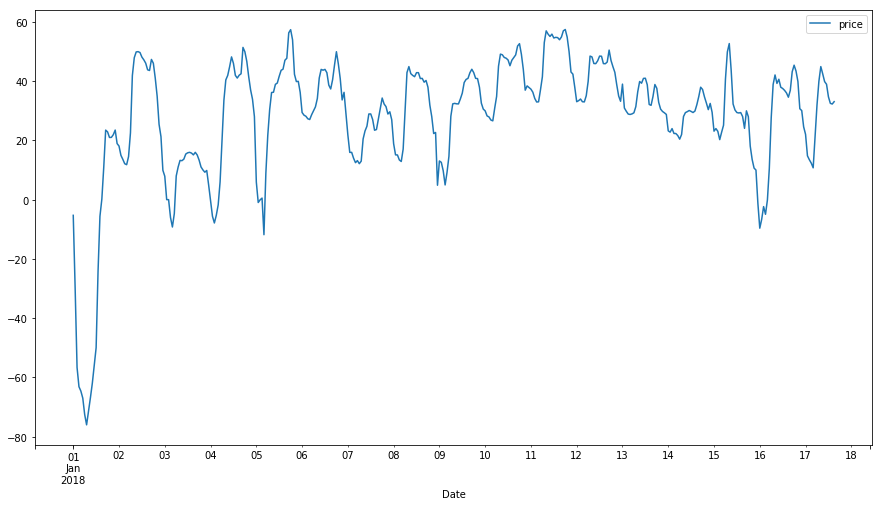

In [17]:
df_price[['price']][:400].plot(figsize=(15,8))
plt.show()

In [18]:
df_price['price'].replace(to_replace=0, method='ffill', inplace=True)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


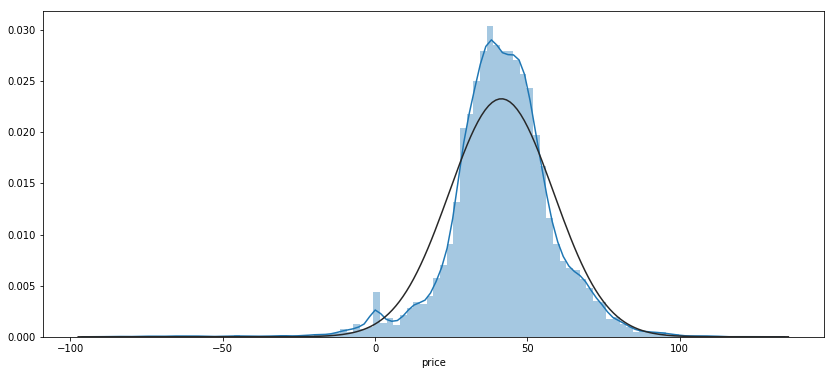

In [19]:
from scipy.stats import norm
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df_price.price, bins=100, fit=norm)

### Residual Load

In [20]:
df_res = pd.read_csv('Wattsight/RES_LOAD_H_N_cwe_20191124_1105.csv', delimiter=';', decimal=",")

In [21]:
df_res['Date'] = pd.to_datetime(df_res['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [22]:
df_res.set_index('Date', inplace=True)

In [23]:
df_res.sort_index(inplace=True)

In [24]:
df_res.fillna(method='ffill', inplace=True)

In [25]:
mask_res = (df_res.index >= start_date) & (df_res.index <= end_date)

In [26]:
df_res = df_res.loc[mask_res]

In [27]:
df_res_de = df_res[['RDL DE Normal MK01 MWh/h H N']]

In [28]:
df_res_de.rename(columns = {'RDL DE Normal MK01 MWh/h H N':'res_load'}, inplace = True)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [29]:
df_res_de.tail()

,res_load
Date,
2019-10-30 19:00:00,49152.6
2019-10-30 20:00:00,44018.5
2019-10-30 21:00:00,40919.9
2019-10-30 22:00:00,38415.9
2019-10-30 23:00:00,34793.8


### Temperatur

In [30]:
df_temp = pd.read_csv('Wattsight/TT_CON_H_N_cwe_20191124_0346.csv', delimiter=';', decimal=",")

In [31]:
df_temp['Date'] = pd.to_datetime(df_temp['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [32]:
df_temp.set_index('Date', inplace=True)

In [33]:
df_temp.sort_index(inplace=True)

In [34]:
df_temp.fillna(method='ffill', inplace=True)

In [35]:
mask_temp = (df_temp.index >= start_date) & (df_temp.index <= end_date)

In [36]:
df_temp = df_temp.loc[mask_temp]

In [37]:
df_temp_de = df_temp[['TT DE CON Norm19802009 MK01 UTC H N']]

In [38]:
df_temp_de.rename(columns = {'TT DE CON Norm19802009 MK01 UTC H N':'temp'}, inplace = True)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [39]:
df_temp_de.head()

,temp
Date,
2018-01-01 00:00:00,1.2
2018-01-01 01:00:00,1.1
2018-01-01 02:00:00,1.0
2018-01-01 03:00:00,1.0
2018-01-01 04:00:00,0.9


### WIND

In [40]:
df_wind = pd.read_csv('Wattsight/PRO_WND_H_N_cwe_20191124_0347.csv', delimiter=';', decimal=",")

In [41]:
df_wind['Date'] = pd.to_datetime(df_wind['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [42]:
df_wind.set_index('Date', inplace=True)

In [43]:
df_wind.sort_index(inplace=True)

In [44]:
df_wind.fillna(method='ffill', inplace=True)

In [45]:
mask_wind = (df_wind.index >= start_date) & (df_wind.index <= end_date)

In [46]:
df_wind = df_wind.loc[mask_wind]

In [47]:
df_wind_de = df_wind[['PRO DE WND Normal MK02 MWh H N']]

In [48]:
df_wind_de.rename(columns = {'PRO DE WND Normal MK02 MWh H N':'wind'}, inplace = True)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [49]:
df_wind_de.head()

,wind
Date,
2018-01-01 00:00:00,18397.9
2018-01-01 01:00:00,18273.4
2018-01-01 02:00:00,18114.6
2018-01-01 03:00:00,17948.1
2018-01-01 04:00:00,17782.9


In [50]:
df_wind_de.shape

(16032, 1)

### Gas Price

In [51]:
df_gas = pd.read_csv('commodity/egix-index-pegas-de-m1-d.csv', delimiter=';', decimal=",")

In [52]:
df_gas.tail()

,DateTime,PEGAS DE M1 DAILY EGIX
366,2019-05-20 00:00:00,13.454
367,2019-05-21 00:00:00,13.199
368,2019-05-22 00:00:00,13.308
369,2019-05-23 00:00:00,13.039
370,2019-05-24 00:00:00,12.726


In [53]:
df_gas['DateTime'] = pd.to_datetime(df_gas['DateTime'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [54]:
df_gas.set_index('DateTime', inplace=True)

In [55]:
df_gas = df_gas.resample('H').pad()

In [56]:
df_gas = df_gas.apply(pd.to_numeric ,errors='coerce')

In [57]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13105 entries, 2017-11-24 00:00:00 to 2019-05-24 00:00:00
Freq: H
Data columns (total 1 columns):
PEGAS DE M1 DAILY EGIX    13105 non-null float64
dtypes: float64(1)
memory usage: 204.8 KB


In [58]:
mask_gas = (df_gas.index >= start_date) & (df_gas.index <= end_date)

In [59]:
df_gas = df_gas.loc[mask_gas]

### Coal Price

In [60]:
df_coal = pd.read_csv('commodity/API2 front 1yr.csv', delimiter=';', decimal=",")

In [61]:
df_coal.head()

,DateTime,"API2 front year, USD/t","API4 front year, USD/t","API5 front year, USD/t"
0,2018-12-12 00:00:00,88.64,93.59,98.25
1,2018-12-13 00:00:00,88.98,94.31,98.77
2,2018-12-14 00:00:00,89.50,94.80,99.10
3,2018-12-17 00:00:00,89.75,95.05,98.92
4,2018-12-18 00:00:00,88.82,94.66,98.39


In [62]:
df_coal['DateTime'] = pd.to_datetime(df_coal['DateTime'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [63]:
df_coal.set_index('DateTime', inplace=True)

In [64]:
df_coal = df_coal.resample('H').pad()

In [65]:
df_coal = df_coal.apply(pd.to_numeric ,errors='coerce')

In [66]:
df_coal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8778 entries, 2018-12-12 00:00:00 to 2019-12-12 17:00:00
Freq: H
Data columns (total 3 columns):
API2 front year, USD/t    8778 non-null float64
API4 front year, USD/t    8778 non-null float64
API5 front year, USD/t    8778 non-null float64
dtypes: float64(3)
memory usage: 594.3 KB


In [67]:
mask_coal = (df_coal.index >= start_date) & (df_coal.index <= end_date)

In [68]:
df_coal = df_coal.loc[mask_coal]

In [69]:
df_coal.drop('API2 front year, USD/t', inplace=True, axis=1)
df_coal.drop('API5 front year, USD/t', inplace=True, axis=1)

### Power Generation

In [70]:
df_gen = pd.read_csv('SMARD/Realisierte_Erzeugung_201801010000_201912312345_1.csv', delimiter=';', decimal=",")

In [71]:
df_gen['Date'] = df_gen['Datum'] + ' ' + df_gen['Uhrzeit']

In [72]:
df_gen['Date'] = pd.to_datetime(df_gen['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [73]:
df_gen.set_index('Date', inplace=True)

In [74]:
df_gen.sort_index(inplace=True)

In [75]:
df_gen.drop('Datum', inplace=True, axis=1)
df_gen.drop('Uhrzeit', inplace=True, axis=1)

In [76]:
df_gen = df_gen.apply(lambda x: x.str.replace('.', ''))
df_gen = df_gen.apply(lambda x: x.str.replace(',', '.'))

In [77]:
df_gen = df_gen.apply(pd.to_numeric ,errors='coerce')

In [78]:
df_gen.fillna(method='ffill', inplace=True)

In [79]:
df_gen = df_gen.resample('H').sum()

In [80]:
mask_gen = (df_gen.index >= start_date) & (df_gen.index <= end_date)

In [81]:
df_gen = df_gen.loc[mask_gen]

In [82]:
df_gen.rename(columns = {'Biomasse[MWh]':'gen_bio', 'Wasserkraft[MWh]':'gen_hyd', 
                         'Wind Offshore[MWh]':'gen_windoff', 'Wind Onshore[MWh]':'gen_windon',
                         'Photovoltaik[MWh]':'gen_pv', 'Sonstige Erneuerbare[MWh]':'gen_reother',
                         'Kernenergie[MWh]':'gen_nuc', 'Braunkohle[MWh]':'gen_bcoal',
                         'Steinkohle[MWh]':'gen_hcoal', 'Erdgas[MWh]':'gen_gas',
                         'Pumpspeicher[MWh]':'gen_pump', 'Sonstige Konventionelle[MWh]':'gen_other'}, inplace = True)

In [83]:
df_gen['gen_total'] = df_gen.sum(axis=1)

In [84]:
gen_total = df_gen['gen_total']
df_gen.drop(labels=['gen_total'], axis=1,inplace = True)
df_gen.insert(0, 'gen_total', gen_total)

In [85]:
df_gen.tail()

,gen_total,gen_bio,gen_hyd,gen_windoff,gen_windon,gen_pv,gen_reother,gen_nuc,gen_bcoal,gen_hcoal,gen_gas,gen_pump,gen_other
Date,,,,,,,,,,,,,
2019-10-30 19:00:00,64181.0,4841.0,1494.0,222.0,6814.0,0.0,196.0,9329.0,14403.0,13823.0,8882.0,2533.0,1644.0
2019-10-30 20:00:00,62638.0,4839.0,1513.0,301.0,7615.0,0.0,196.0,9333.0,14226.0,13350.0,8484.0,1136.0,1645.0
2019-10-30 21:00:00,59290.0,4851.0,1528.0,365.0,7979.0,0.0,196.0,9334.0,13996.0,10911.0,8203.0,280.0,1647.0
2019-10-30 22:00:00,56192.0,4856.0,1544.0,391.0,7660.0,0.0,196.0,9340.0,13877.0,8314.0,8032.0,354.0,1628.0
2019-10-30 23:00:00,53928.0,4842.0,1561.0,321.0,7323.0,0.0,196.0,9341.0,13581.0,7180.0,7612.0,327.0,1644.0


### Power Generation Forecast

In [86]:
df_gen_f = pd.read_csv('SMARD/Prognostizierte_Erzeugung_201801010000_201912312359_1.csv', delimiter=';', decimal=",")

In [87]:
df_gen_f['Date'] = df_gen_f['Datum'] + ' ' + df_gen_f['Uhrzeit']

In [88]:
df_gen_f['Date'] = pd.to_datetime(df_gen_f['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [89]:
df_gen_f.set_index('Date', inplace=True)

In [90]:
df_gen_f.sort_index(inplace=True)

In [91]:
df_gen_f.drop('Datum', inplace=True, axis=1)
df_gen_f.drop('Uhrzeit', inplace=True, axis=1)

In [92]:
df_gen_f = df_gen_f.apply(lambda x: x.str.replace('.', ''))
df_gen_f = df_gen_f.apply(lambda x: x.str.replace(',', '.'))

In [93]:
df_gen_f = df_gen_f.apply(pd.to_numeric ,errors='coerce')

In [94]:
df_gen_f.fillna(method='ffill', inplace=True)

In [95]:
df_gen_f = df_gen_f.resample('H').sum()

In [96]:
mask_gen_f = (df_gen_f.index >= start_date) & (df_gen_f.index <= end_date)

In [97]:
df_gen_f = df_gen_f.loc[mask_gen_f]

In [98]:
df_gen_f.rename(columns = {'Gesamt[MWh]':'gen_f_total', 'Wind Offshore[MWh]':'gen_f_windoff', 
                           'Wind Onshore[MWh]':'gen_f_windon', 'Photovoltaik[MWh]':'gen_f_pv',
                           'Sonstige[MWh]':'gen_f_other'}, inplace = True)

In [99]:
df_gen_f.tail()

,gen_f_total,gen_f_windoff,gen_f_windon,gen_f_pv,gen_f_other
Date,,,,,
2019-10-30 19:00:00,260844.0,207.0,5405.0,0.0,238392.0
2019-10-30 20:00:00,250852.0,268.0,5830.0,0.0,226464.0
2019-10-30 21:00:00,240076.0,332.0,6095.0,0.0,214372.0
2019-10-30 22:00:00,226856.0,425.0,6222.0,0.0,200272.0
2019-10-30 23:00:00,215304.0,496.0,6072.0,0.0,189040.0


### Demand 

In [100]:
df_dm = pd.read_csv('SMARD/Realisierter_Stromverbrauch_201801010000_201912312345_1.csv', delimiter=';', decimal=",")

In [101]:
df_dm['Date'] = df_dm['Datum'] + ' ' + df_dm['Uhrzeit']

In [102]:
df_dm['Date'] = pd.to_datetime(df_dm['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [103]:
df_dm.set_index('Date', inplace=True)

In [104]:
df_dm.sort_index(inplace=True)

In [105]:
df_dm.drop('Datum', inplace=True, axis=1)
df_dm.drop('Uhrzeit', inplace=True, axis=1)

In [106]:
df_dm = df_dm.apply(lambda x: x.str.replace('.', ''))
df_dm = df_dm.apply(lambda x: x.str.replace(',', '.'))

In [107]:
df_dm = df_dm.apply(pd.to_numeric ,errors='coerce')

In [108]:
df_dm.fillna(method='ffill', inplace=True)

In [109]:
df_dm = df_dm.resample('H').sum()

In [110]:
mask_dm = (df_dm.index >= start_date) & (df_dm.index <= end_date)

In [111]:
df_dm = df_dm.loc[mask_dm]

In [112]:
df_dm.rename(columns = {'Gesamt[MWh]':'dm'}, inplace = True)

In [113]:
df_dm.tail()

,dm
Date,
2019-10-30 19:00:00,64448.0
2019-10-30 20:00:00,60921.0
2019-10-30 21:00:00,58393.0
2019-10-30 22:00:00,55386.0
2019-10-30 23:00:00,51758.0


### Demand Forecast

In [114]:
df_dm_f = pd.read_csv('SMARD/Prognostizierter_Stromverbrauch_201801010000_201912312345_1.csv', delimiter=';', decimal=",")

In [115]:
df_dm_f['Date'] = df_dm_f['Datum'] + ' ' + df_dm_f['Uhrzeit']

In [116]:
df_dm_f['Date'] = pd.to_datetime(df_dm_f['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [117]:
df_dm_f.set_index('Date', inplace=True)

In [118]:
df_dm_f.sort_index(inplace=True)

In [119]:
df_dm_f.drop('Datum', inplace=True, axis=1)
df_dm_f.drop('Uhrzeit', inplace=True, axis=1)

In [120]:
df_dm_f = df_dm_f.apply(lambda x: x.str.replace('.', ''))
df_dm_f = df_dm_f.apply(lambda x: x.str.replace(',', '.'))

In [121]:
df_dm_f = df_dm_f.apply(pd.to_numeric ,errors='coerce')

In [122]:
df_dm_f.fillna(method='ffill', inplace=True)

In [123]:
df_dm_f = df_dm_f.resample('H').sum()

In [124]:
mask_dm_f = (df_dm_f.index >= start_date) & (df_dm_f.index <= end_date)

In [125]:
df_dm_f = df_dm_f.loc[mask_dm_f]

In [126]:
df_dm_f.rename(columns = {'Gesamt[MWh]':'dm_f'}, inplace = True)

In [127]:
df_dm_f.tail()

,dm_f
Date,
2019-10-30 19:00:00,65034.0
2019-10-30 20:00:00,61464.0
2019-10-30 21:00:00,57968.0
2019-10-30 22:00:00,54842.0
2019-10-30 23:00:00,50861.0


### Net Export

In [128]:
df_netex = pd.read_csv('SMARD/Kommerzieller_Au_enhandel_201801010000_201912312359_1.csv', delimiter=';', decimal=",")

In [129]:
df_netex['Date'] = df_netex['Datum'] + ' ' + df_netex['Uhrzeit']

In [130]:
df_netex['Date'] = pd.to_datetime(df_netex['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [131]:
df_netex.set_index('Date', inplace=True)

In [132]:
df_netex.sort_index(inplace=True)

In [133]:
df_netex.drop('Datum', inplace=True, axis=1)
df_netex.drop('Uhrzeit', inplace=True, axis=1)

In [134]:
df_netex = df_netex.apply(lambda x: x.str.replace('.', ''))
df_netex = df_netex.apply(lambda x: x.str.replace(',', '.'))

In [135]:
df_netex = df_netex.apply(pd.to_numeric ,errors='coerce')

In [136]:
df_netex.fillna(0, inplace=True)

In [137]:
df_netex = df_netex.resample('H').sum()

In [138]:
mask_df_netex = (df_netex.index >= start_date) & (df_netex.index <= end_date)

In [139]:
df_netex = df_netex.loc[mask_df_netex]

In [140]:
df_netex.rename(columns = {'Kommerzieller Nettoexport[MWh]':'netex'}, inplace = True)

In [141]:
df_netex = df_netex[['netex']]

In [142]:
df_netex.tail()

,netex
Date,
2019-10-30 19:00:00,777.0
2019-10-30 20:00:00,2758.0
2019-10-30 21:00:00,2735.0
2019-10-30 22:00:00,2694.0
2019-10-30 23:00:00,2549.0


### Minutenreserve

In [143]:
df_mres = pd.read_csv('SMARD/Minutenreserve_201801010000_201912312345_1.csv', delimiter=';', decimal=",")

In [144]:
df_mres['Date'] = df_mres['Datum'] + ' ' + df_mres['Uhrzeit']

In [145]:
df_mres['Date'] = pd.to_datetime(df_mres['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [146]:
df_mres.set_index('Date', inplace=True)

In [147]:
df_mres.sort_index(inplace=True)

In [148]:
df_mres.drop('Datum', inplace=True, axis=1)
df_mres.drop('Uhrzeit', inplace=True, axis=1)

In [149]:
df_mres = df_mres.apply(lambda x: x.str.replace('.', ''))
df_mres = df_mres.apply(lambda x: x.str.replace(',', '.'))

In [150]:
df_mres = df_mres.apply(pd.to_numeric ,errors='coerce')

In [151]:
df_mres.fillna(0, inplace=True)

In [152]:
df_mres = df_mres.resample('H').sum()

In [153]:
mask_df_mres = (df_mres.index >= start_date) & (df_mres.index <= end_date)

In [154]:
df_mres = df_mres.loc[mask_df_mres]

In [155]:
df_mres['mres+'] = df_mres['Abgerufene Menge (+)[MWh]']

In [156]:
df_mres['mres-'] = - df_mres['Abgerufene Menge (-)[MWh]']

In [157]:
df_mres.drop('Abgerufene Menge (+)[MWh]', inplace=True, axis=1)
df_mres.drop('Abgerufene Menge (-)[MWh]', inplace=True, axis=1)
df_mres.drop('Arbeitspreis (+)[Euro/MWh]', inplace=True, axis=1)
df_mres.drop('Arbeitspreis (-)[Euro/MWh]', inplace=True, axis=1)
df_mres.drop('Vorgehaltene Menge (+)[MW]', inplace=True, axis=1)
df_mres.drop('Vorgehaltene Menge (-)[MW]', inplace=True, axis=1)
df_mres.drop('Leistungspreis (+)[Euro/MW]', inplace=True, axis=1)
df_mres.drop('Leistungspreis (-)[Euro/MW]', inplace=True, axis=1)

In [158]:
df_mres.tail()

,mres+,mres-
Date,,
2019-10-30 19:00:00,0.0,-0.0
2019-10-30 20:00:00,0.0,-0.0
2019-10-30 21:00:00,0.0,-0.0
2019-10-30 22:00:00,0.0,-0.0
2019-10-30 23:00:00,0.0,-0.0


### Sekundärregelleistung

In [159]:
df_sres = pd.read_csv('SMARD/Sekund_rregelleistung_201801010000_201912312345_1.csv', delimiter=';', decimal=",")

In [160]:
df_sres['Date'] = df_sres['Datum'] + ' ' + df_sres['Uhrzeit']

In [161]:
df_sres['Date'] = pd.to_datetime(df_sres['Date'], dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d %H:%M:%S')

In [162]:
df_sres.set_index('Date', inplace=True)

In [163]:
df_sres.sort_index(inplace=True)

In [164]:
df_sres.drop('Datum', inplace=True, axis=1)
df_sres.drop('Uhrzeit', inplace=True, axis=1)

In [165]:
df_sres = df_sres.apply(lambda x: x.str.replace('.', ''))
df_sres = df_sres.apply(lambda x: x.str.replace(',', '.'))

In [166]:
df_sres = df_sres.apply(pd.to_numeric ,errors='coerce')

In [167]:
df_sres.fillna(method='ffill', inplace=True)

In [168]:
df_sres = df_sres.resample('H').sum()

In [169]:
mask_df_sres = (df_sres.index >= start_date) & (df_sres.index <= end_date)

In [170]:
df_sres = df_sres.loc[mask_df_sres]

In [171]:
df_sres['sres+'] = df_sres['Abgerufene Menge (+)[MWh]']
df_sres['sres-'] = - df_sres['Abgerufene Menge (-)[MWh]']

In [172]:
df_sres.drop('Abgerufene Menge (+)[MWh]', inplace=True, axis=1)
df_sres.drop('Abgerufene Menge (-)[MWh]', inplace=True, axis=1)
df_sres.drop('Arbeitspreis (+)[Euro/MWh]', inplace=True, axis=1)
df_sres.drop('Arbeitspreis (-)[Euro/MWh]', inplace=True, axis=1)
df_sres.drop('Vorgehaltene Menge (+)[MW]', inplace=True, axis=1)
df_sres.drop('Vorgehaltene Menge (-)[MW]', inplace=True, axis=1)
df_sres.drop('Leistungspreis (+)[Euro/MW]', inplace=True, axis=1)
df_sres.drop('Leistungspreis (-)[Euro/MW]', inplace=True, axis=1)

In [173]:
df_sres.tail()

,sres+,sres-
Date,,
2019-10-30 19:00:00,5.0,-120.0
2019-10-30 20:00:00,12.0,-268.0
2019-10-30 21:00:00,63.0,-90.0
2019-10-30 22:00:00,36.0,-88.0
2019-10-30 23:00:00,72.0,-93.0


### Ausgleichsenergie

### Weather DWD

In [174]:
df_weather = pd.read_csv('weather/weather_data.csv', delimiter=',')

In [175]:
df_weather.head()

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_CSA,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_CSA,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_CSA,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_CSA,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
0,2005010100,120.0,0.0,0.0,0,148.86,0.0,4.7,95.0,4.0,7.0,7.0,ST-999,90.0,4.0,6.0,SC-999,540.0,7.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1020.2,NaN,2.2,350,-999.0,5.6,5.5,5.2,4.6,5.2,2000.0
1,2005010101,100.0,0.0,0.0,0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,ST-999,90.0,1.0,6.0,SC-999,1050.0,7.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1020.5,NaN,1.5,310,-999.0,5.3,5.4,5.2,4.6,5.1,3500.0
2,2005010102,89.0,0.0,0.0,0,138.39,0.0,3.1,96.0,2.5,2.0,7.0,ST-999,30.0,2.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1021.3,NaN,1.5,280,-999.0,4.7,5.1,5.1,4.6,5.1,800.0
3,2005010103,104.0,0.0,0.0,0,130.31,0.0,2.8,100.0,2.8,-1.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1021.7,0.0,2.5,290,-999.0,4.1,4.8,5.1,4.7,5.2,300.0
4,2005010104,111.0,0.0,0.0,0,121.57,0.0,2.2,97.0,1.8,-1.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1021.5,0.0,0.8,210,-999.0,3.8,4.5,4.9,4.7,5.2,300.0


In [176]:
df_weather.rename(columns = {'MESS_DATUM':'Date'}, inplace = True)

In [177]:
df_weather['Date'] = df_weather['Date'].astype(str)

In [178]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'], dayfirst=True, infer_datetime_format=True, format='%Y%m%d%H')

In [179]:
df_weather.set_index('Date', inplace=True)

In [180]:
df_weather.sort_index(inplace=True)

In [181]:
df_weather.columns

Index(['ATMO_LBERG', 'FD_LBERG', 'FG_LBERG', 'SD_LBERG', 'ZENIT', 'R1',
       'TT_TU', 'RF_TU', 'TD', 'V_N', 'V_S1_CS', 'V_S1_CSA', 'V_S1_HHS',
       'V_S1_NS', 'V_S2_CS', 'V_S2_CSA', 'V_S2_HHS', 'V_S2_NS', 'V_S3_CS',
       'V_S3_CSA', 'V_S3_HHS', 'V_S3_NS', 'V_S4_CS', 'V_S4_CSA', 'V_S4_HHS',
       'V_S4_NS', 'P', 'SD_SO', 'FF', 'DD', 'V_TE002', 'V_TE005', 'V_TE010',
       'V_TE020', 'V_TE050', 'V_TE100', 'V_VV'],
      dtype='object')

In [182]:
df_weather.drop(['ATMO_LBERG', 'FD_LBERG', 'FG_LBERG', 'SD_LBERG', 'ZENIT', 'R1',
       'TT_TU', 'RF_TU', 'TD', 'V_N', 'V_S1_CS', 'V_S1_CSA', 'V_S1_HHS',
       'V_S1_NS', 'V_S2_CS', 'V_S2_CSA', 'V_S2_HHS', 'V_S2_NS', 'V_S3_CS',
       'V_S3_CSA', 'V_S3_HHS', 'V_S3_NS', 'V_S4_CS', 'V_S4_CSA', 'V_S4_HHS',
       'V_S4_NS', 'P', 'SD_SO', 'DD', 'V_TE002', 'V_TE005', 'V_TE010',
       'V_TE020', 'V_TE050', 'V_TE100', 'V_VV'], inplace=True, axis=1)

In [183]:
df_weather = df_weather.resample('H').mean()

In [184]:
mask_weather = (df_weather.index >= start_date) & (df_weather.index <= end_date)

In [185]:
df_weather = df_weather.loc[mask_weather]

In [186]:
df_weather['FF'].replace(to_replace=-999, method='ffill', inplace=True)

In [187]:
df_weather.describe()

,FF
count,16032.000000
mean,4.104591
std,2.237700
min,0.000000
25%,2.400000
50%,3.800000
75%,5.500000
max,13.900000


/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


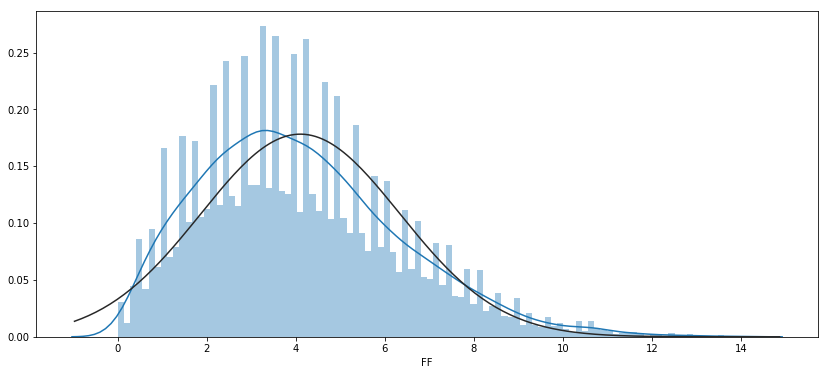

In [188]:
from scipy.stats import norm
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df_weather.FF, bins=100, fit=norm)

### DATASET

In [189]:
#df = pd.merge(df_price, df_res_de, left_index=True, right_index=True, sort=True)
#df = pd.merge(df, df_temp_de, how='inner', left_index=True, right_index=True)            
#df = pd.merge(df, df_wind_de, left_index=True, right_index=True)
#df = pd.merge(df, df_gen, left_index=True, right_index=True)
#df = pd.merge(df, df_gen_f, left_index=True, right_index=True)
#df = pd.merge(df, df_dm, left_index=True, right_index=True)
#df = pd.merge(df, df_dm_f, left_index=True, right_index=True)

In [190]:
df = pd.concat([df_price,
                df_res_de,
                df_temp_de,
                df_wind_de,
                df_gen,
                df_gen_f,
                df_dm,
                df_dm_f,
                df_netex,
                df_mres,
                df_sres,
                df_weather,], join='inner', axis=1)

In [191]:
df.head(10)

,price,res_load,temp,wind,gen_total,gen_bio,gen_hyd,gen_windoff,gen_windon,gen_pv,gen_reother,gen_nuc,gen_bcoal,gen_hcoal,gen_gas,gen_pump,gen_other,gen_f_total,gen_f_windoff,gen_f_windon,gen_f_pv,gen_f_other,dm,dm_f,netex,mres+,mres-,sres+,sres-,FF
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,-5.27,31976.4,1.2,18397.9,55872.00,4779.25,1783.75,2917.50,28660.25,0.0,147.0,5853.75,6745.00,1225.00,1781.75,354.00,1624.75,254732.0,3007.25,27914.0,0.0,131048.0,43802.75,41305.75,14933.0,0.0,-0.0,67.25,-29.00,3.9
2018-01-01 01:00:00,-29.99,30129.1,1.1,18273.4,56673.00,4764.50,1676.25,2999.25,30105.50,0.0,147.0,4754.00,6831.00,1209.00,1786.25,738.50,1661.75,252128.0,2925.25,29384.0,0.0,122892.0,43341.75,39459.00,15845.0,100.0,-0.0,296.25,-6.00,7.1
2018-01-01 02:00:00,-56.65,29368.7,1.0,18114.6,56914.75,4766.75,1672.00,3096.00,30772.75,0.0,146.0,4591.00,6787.25,1260.25,1790.75,441.00,1591.00,252116.0,3011.25,30585.0,0.0,117736.0,42531.00,38436.75,16276.0,0.0,-0.0,281.50,-7.00,5.7
2018-01-01 03:00:00,-63.14,29008.6,1.0,17948.1,57594.50,4771.00,1658.25,3136.75,31641.50,0.0,146.0,4888.75,6745.75,1246.75,1808.25,5.25,1546.25,254696.0,3061.50,31859.0,0.0,115020.0,41524.25,38260.75,16362.0,0.0,-0.0,99.50,-19.00,7.0
2018-01-01 04:00:00,-64.62,29538.3,0.9,17782.9,57390.25,4776.50,1654.00,3212.00,31529.00,0.0,146.0,4696.50,6727.75,1244.50,1805.75,6.25,1592.00,257908.0,3202.25,32978.0,0.0,113188.0,41555.25,38562.00,15643.0,0.0,-0.0,18.75,-26.00,6.8
2018-01-01 05:00:00,-67.00,29377.5,0.8,17615.1,58147.00,4768.75,1648.25,3281.50,32063.00,0.0,146.0,4830.75,6746.00,1247.75,1788.25,9.00,1617.75,257716.0,3369.50,33634.0,0.0,109704.0,41743.00,38668.50,15585.0,0.0,-0.0,144.75,-5.50,8.1
2018-01-01 06:00:00,-72.54,29497.7,0.8,17455.9,57695.25,4781.00,1638.00,3291.00,31447.25,0.0,146.0,4762.50,6678.00,1241.00,1702.00,415.75,1592.75,257840.0,3517.75,34143.0,0.0,107200.0,40954.75,37844.75,15669.0,0.0,-0.0,11.25,-238.50,7.8
2018-01-01 07:00:00,-76.01,31684.4,0.7,17390.4,56823.50,4793.75,1623.00,3281.75,30918.00,0.0,146.0,4639.00,6590.50,1233.25,1664.00,415.50,1518.75,257964.0,3725.50,34327.0,0.0,105760.0,41257.50,39405.25,14330.0,0.0,-0.0,0.75,-611.50,7.7
2018-01-01 08:00:00,-71.45,34288.9,0.6,17408.6,55971.25,4810.00,1613.25,3284.75,30311.00,173.5,146.0,4616.25,6517.75,979.25,1650.50,417.00,1452.00,262612.0,3830.50,34166.0,211.0,109788.0,42078.00,42383.25,13385.0,0.0,-0.0,1.25,-850.50,8.1


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16032 entries, 2018-01-01 00:00:00 to 2019-10-30 23:00:00
Data columns (total 30 columns):
price            16032 non-null float64
res_load         16032 non-null float64
temp             16032 non-null float64
wind             16032 non-null float64
gen_total        16032 non-null float64
gen_bio          16032 non-null float64
gen_hyd          16032 non-null float64
gen_windoff      16032 non-null float64
gen_windon       16032 non-null float64
gen_pv           16032 non-null float64
gen_reother      16032 non-null float64
gen_nuc          16032 non-null float64
gen_bcoal        16032 non-null float64
gen_hcoal        16032 non-null float64
gen_gas          16032 non-null float64
gen_pump         16032 non-null float64
gen_other        16032 non-null float64
gen_f_total      16032 non-null float64
gen_f_windoff    16032 non-null float64
gen_f_windon     16032 non-null float64
gen_f_pv         16032 non-null float64
gen_f_other     

### Deltas

In [193]:
df['gen_delta'] = df['gen_f_total'] - df['gen_total']

In [194]:
df['gen_windoff_delta'] = df['gen_f_windoff'] - df['gen_windoff']

In [195]:
df['gen_windon_delta'] = df['gen_f_windon'] - df['gen_windon']

In [196]:
df['gen_pv_delta'] = df['gen_f_pv'] - df['gen_pv']

In [197]:
df['dm_delta'] = df['dm_f'] - df['dm']

In [198]:
df['dm_gen_delta'] = df['dm'] - df['gen_total']

### Delta Ratios

In [199]:
df['dm_gen_ratio'] = df['gen_total'] / df['dm']

### Merit Order Flags

In [200]:
df['gen_nuc_min'] = df['gen_nuc'].min()
df['gen_bcoal_min'] = df['gen_bcoal'].min()
df['gen_hcoal_min'] = df['gen_hcoal'].min()
df['gen_gas_min'] = df['gen_gas'].min()
df['gen_other_min'] = df['gen_other'].min()

In [201]:
df['merit_ren'] = df['dm'] - df['gen_pv'] - df['gen_windoff'] - df['gen_windon'] - df['gen_reother'] - df['gen_bio'] - df['gen_hyd']

In [202]:
df['merit_inflex'] = df['merit_ren'] - df['gen_nuc_min'] - df['gen_bcoal_min'] - df['gen_hcoal_min'] - df['gen_gas_min'] - df['gen_other_min']

In [203]:
df['merit_nuc'] = df['merit_inflex'] - df['gen_nuc'] + df['gen_nuc_min']

In [204]:
df['merit_bcoal'] = df['merit_nuc'] - df['gen_bcoal'] + df['gen_bcoal_min']

In [205]:
df['merit_hcoal'] = df['merit_bcoal'] - df['gen_hcoal'] + df['gen_hcoal_min'] - df['gen_other'] + df['gen_other_min']

In [206]:
df['merit_gas'] = df['merit_hcoal'] - df['gen_gas'] + df['gen_gas_min']

In [207]:
merit_ren_flag = []
for i in df.merit_ren:
    if i <= 0:
        merit_ren_flag.append(1)
    else: 
        merit_ren_flag.append(0)

df['merit_ren_flag'] = merit_ren_flag

In [208]:
df['merit_inflex_flag'] = np.where(((df.merit_ren >= 0) & (df.merit_inflex < 0)), 1, 0)

In [209]:
df['merit_nuc_flag'] = np.where(((df.merit_inflex >= 0) & (df.merit_nuc < 0)), 1, 0)

In [210]:
df['merit_bcoal_flag'] = np.where(((df.merit_nuc >= 0) & (df.merit_bcoal < 0)), 1, 0)

In [211]:
df['merit_hcoal_flag'] = np.where(((df.merit_bcoal >= 0) & (df.merit_hcoal < 0)), 1, 0)

In [212]:
df['merit_gas_flag'] = np.where(((df.merit_hcoal >= 0) & (df.merit_gas < 0)), 1, 0)

In [213]:
df['merit_import_flag'] = np.where(((df.merit_gas > 0)), 1, 0)

In [214]:
df['merit'] = 0 
df.loc[df['merit_ren_flag'] == 1, 'merit'] = 1
df.loc[df['merit_inflex_flag'] == 1, 'merit'] = 2
df.loc[df['merit_nuc_flag'] == 1, 'merit'] = 3
df.loc[df['merit_bcoal_flag'] == 1, 'merit'] = 4
df.loc[df['merit_hcoal_flag'] == 1, 'merit'] = 5
df.loc[df['merit_gas_flag'] == 1, 'merit'] = 6
df.loc[df['merit_import_flag'] == 1, 'merit'] = 7

In [215]:
df.head(50)

,price,res_load,temp,wind,gen_total,gen_bio,gen_hyd,gen_windoff,gen_windon,gen_pv,gen_reother,gen_nuc,gen_bcoal,gen_hcoal,gen_gas,gen_pump,gen_other,gen_f_total,gen_f_windoff,gen_f_windon,gen_f_pv,gen_f_other,dm,dm_f,netex,...,gen_windoff_delta,gen_windon_delta,gen_pv_delta,dm_delta,dm_gen_delta,dm_gen_ratio,gen_nuc_min,gen_bcoal_min,gen_hcoal_min,gen_gas_min,gen_other_min,merit_ren,merit_inflex,merit_nuc,merit_bcoal,merit_hcoal,merit_gas,merit_ren_flag,merit_inflex_flag,merit_nuc_flag,merit_bcoal_flag,merit_hcoal_flag,merit_gas_flag,merit_import_flag,merit
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,-5.27,31976.4,1.2,18397.9,55872.00,4779.25,1783.75,2917.50,28660.25,0.00,147.00,5853.75,6745.00,1225.00,1781.75,354.00,1624.75,254732.0,3007.25,27914.0,0.0,131048.0,43802.75,41305.75,14933.0,...,89.75,-746.25,0.00,-2497.00,-12069.25,1.275536,3382.25,3813.0,447.0,236.25,889.5,5515.00,-3253.00,-5724.50,-8656.50,-10169.75,-11715.25,0,1,0,0,0,0,0,2
2018-01-01 01:00:00,-29.99,30129.1,1.1,18273.4,56673.00,4764.50,1676.25,2999.25,30105.50,0.00,147.00,4754.00,6831.00,1209.00,1786.25,738.50,1661.75,252128.0,2925.25,29384.0,0.0,122892.0,43341.75,39459.00,15845.0,...,-74.00,-721.50,0.00,-3882.75,-13331.25,1.307584,3382.25,3813.0,447.0,236.25,889.5,3649.25,-5118.75,-6490.50,-9508.50,-11042.75,-12592.75,0,1,0,0,0,0,0,2
2018-01-01 02:00:00,-56.65,29368.7,1.0,18114.6,56914.75,4766.75,1672.00,3096.00,30772.75,0.00,146.00,4591.00,6787.25,1260.25,1790.75,441.00,1591.00,252116.0,3011.25,30585.0,0.0,117736.0,42531.00,38436.75,16276.0,...,-84.75,-187.75,0.00,-4094.25,-14383.75,1.338194,3382.25,3813.0,447.0,236.25,889.5,2077.50,-6690.50,-7899.25,-10873.50,-12388.25,-13942.75,0,1,0,0,0,0,0,2
2018-01-01 03:00:00,-63.14,29008.6,1.0,17948.1,57594.50,4771.00,1658.25,3136.75,31641.50,0.00,146.00,4888.75,6745.75,1246.75,1808.25,5.25,1546.25,254696.0,3061.50,31859.0,0.0,115020.0,41524.25,38260.75,16362.0,...,-75.25,217.50,0.00,-3263.50,-16070.25,1.387009,3382.25,3813.0,447.0,236.25,889.5,170.75,-8597.25,-10103.75,-13036.50,-14493.00,-16065.00,0,1,0,0,0,0,0,2
2018-01-01 04:00:00,-64.62,29538.3,0.9,17782.9,57390.25,4776.50,1654.00,3212.00,31529.00,0.00,146.00,4696.50,6727.75,1244.50,1805.75,6.25,1592.00,257908.0,3202.25,32978.0,0.0,113188.0,41555.25,38562.00,15643.0,...,-9.75,1449.00,0.00,-2993.25,-15835.00,1.381059,3382.25,3813.0,447.0,236.25,889.5,237.75,-8530.25,-9844.50,-12759.25,-14259.25,-15828.75,0,1,0,0,0,0,0,2
2018-01-01 05:00:00,-67.00,29377.5,0.8,17615.1,58147.00,4768.75,1648.25,3281.50,32063.00,0.00,146.00,4830.75,6746.00,1247.75,1788.25,9.00,1617.75,257716.0,3369.50,33634.0,0.0,109704.0,41743.00,38668.50,15585.0,...,88.00,1571.00,0.00,-3074.50,-16404.00,1.392976,3382.25,3813.0,447.0,236.25,889.5,-164.50,-8932.50,-10381.00,-13314.00,-14843.00,-16395.00,1,0,0,0,0,0,0,1
2018-01-01 06:00:00,-72.54,29497.7,0.8,17455.9,57695.25,4781.00,1638.00,3291.00,31447.25,0.00,146.00,4762.50,6678.00,1241.00,1702.00,415.75,1592.75,257840.0,3517.75,34143.0,0.0,107200.0,40954.75,37844.75,15669.0,...,226.75,2695.75,0.00,-3110.00,-16740.50,1.408756,3382.25,3813.0,447.0,236.25,889.5,-348.50,-9116.50,-10496.75,-13361.75,-14859.00,-16324.75,1,0,0,0,0,0,0,1
2018-01-01 07:00:00,-76.01,31684.4,0.7,17390.4,56823.50,4793.75,1623.00,3281.75,30918.00,0.00,146.00,4639.00,6590.50,1233.25,1664.00,415.50,1518.75,257964.0,3725.50,34327.0,0.0,105760.0,41257.50,39405.25,14330.0,...,443.75,3409.00,0.00,-1852.25,-15566.00,1.377289,3382.25,3813.0,447.0,236.25,889.5,495.00,-8273.00,-9529.75,-12307.25,-13722.75,-15150.50,0,1,0,0,0,0,0,2
2018-01-01 08:00:00,-71.45,34288.9,0.6,17408.6,55971.25,4810.00,1613.25,3284.75,30311.00,173.50,146.00,4616.25,6517.75,979.25,1650.50,417.00,1452.00,262612.0,3830.50,34166.0,211.0,109788.0,42078.00,42383.25,13385.0,...,545.75,3855.00,37.50,305.25,-13893.25,1.330178,3382.25,3813.0,447.0,236.25,889.5,1739.50,-7028.50,-8262.50,-10967.25,-12062.00,-13476.25,0,1,0,0,0,0,0,2


### Time Flag

#### Weekend

In [216]:
df['day'] = df.index.weekday

In [217]:
df['weekend'] = 0 
df.loc[df['day'] == 5, 'weekend'] = 1
df.loc[df['day'] == 6, 'weekend'] = 1

In [218]:
public_holiday = ['01.01.2018', '30.03.2018', '02.04.2018', '01.05.2018', '10.05.2018', '21.05.2018', '03.10.2018',
                 '25.12.2018', '26.12.2018', 
                 '01.01.2019', '19.04.2019', '22.04.2019', '01.05.2019', '30.05.2019', '10.06.2019', '03.10.2019',
                 '25.12.2019', '26.12.2019']

public_holiday = pd.to_datetime(public_holiday, dayfirst=True, infer_datetime_format=True, format='%Y-%m-%d')

In [219]:
for i in df.index:
    if i.date() in public_holiday:
        #print(i)
        df.loc[i, 'weekend'] = 1

In [220]:
df.head()

,price,res_load,temp,wind,gen_total,gen_bio,gen_hyd,gen_windoff,gen_windon,gen_pv,gen_reother,gen_nuc,gen_bcoal,gen_hcoal,gen_gas,gen_pump,gen_other,gen_f_total,gen_f_windoff,gen_f_windon,gen_f_pv,gen_f_other,dm,dm_f,netex,...,gen_pv_delta,dm_delta,dm_gen_delta,dm_gen_ratio,gen_nuc_min,gen_bcoal_min,gen_hcoal_min,gen_gas_min,gen_other_min,merit_ren,merit_inflex,merit_nuc,merit_bcoal,merit_hcoal,merit_gas,merit_ren_flag,merit_inflex_flag,merit_nuc_flag,merit_bcoal_flag,merit_hcoal_flag,merit_gas_flag,merit_import_flag,merit,day,weekend
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,-5.27,31976.4,1.2,18397.9,55872.00,4779.25,1783.75,2917.50,28660.25,0.0,147.0,5853.75,6745.00,1225.00,1781.75,354.00,1624.75,254732.0,3007.25,27914.0,0.0,131048.0,43802.75,41305.75,14933.0,...,0.0,-2497.00,-12069.25,1.275536,3382.25,3813.0,447.0,236.25,889.5,5515.00,-3253.00,-5724.50,-8656.50,-10169.75,-11715.25,0,1,0,0,0,0,0,2,0,1
2018-01-01 01:00:00,-29.99,30129.1,1.1,18273.4,56673.00,4764.50,1676.25,2999.25,30105.50,0.0,147.0,4754.00,6831.00,1209.00,1786.25,738.50,1661.75,252128.0,2925.25,29384.0,0.0,122892.0,43341.75,39459.00,15845.0,...,0.0,-3882.75,-13331.25,1.307584,3382.25,3813.0,447.0,236.25,889.5,3649.25,-5118.75,-6490.50,-9508.50,-11042.75,-12592.75,0,1,0,0,0,0,0,2,0,1
2018-01-01 02:00:00,-56.65,29368.7,1.0,18114.6,56914.75,4766.75,1672.00,3096.00,30772.75,0.0,146.0,4591.00,6787.25,1260.25,1790.75,441.00,1591.00,252116.0,3011.25,30585.0,0.0,117736.0,42531.00,38436.75,16276.0,...,0.0,-4094.25,-14383.75,1.338194,3382.25,3813.0,447.0,236.25,889.5,2077.50,-6690.50,-7899.25,-10873.50,-12388.25,-13942.75,0,1,0,0,0,0,0,2,0,1
2018-01-01 03:00:00,-63.14,29008.6,1.0,17948.1,57594.50,4771.00,1658.25,3136.75,31641.50,0.0,146.0,4888.75,6745.75,1246.75,1808.25,5.25,1546.25,254696.0,3061.50,31859.0,0.0,115020.0,41524.25,38260.75,16362.0,...,0.0,-3263.50,-16070.25,1.387009,3382.25,3813.0,447.0,236.25,889.5,170.75,-8597.25,-10103.75,-13036.50,-14493.00,-16065.00,0,1,0,0,0,0,0,2,0,1
2018-01-01 04:00:00,-64.62,29538.3,0.9,17782.9,57390.25,4776.50,1654.00,3212.00,31529.00,0.0,146.0,4696.50,6727.75,1244.50,1805.75,6.25,1592.00,257908.0,3202.25,32978.0,0.0,113188.0,41555.25,38562.00,15643.0,...,0.0,-2993.25,-15835.00,1.381059,3382.25,3813.0,447.0,236.25,889.5,237.75,-8530.25,-9844.50,-12759.25,-14259.25,-15828.75,0,1,0,0,0,0,0,2,0,1


#### Month

In [221]:
df['month'] = df.index.month

#### Season

In [222]:
df['season'] = 0 
df.loc[df['month'] == 1, 'season'] = 1
df.loc[df['month'] == 2, 'season'] = 1
df.loc[df['month'] == 3, 'season'] = 2
df.loc[df['month'] == 4, 'season'] = 2
df.loc[df['month'] == 5, 'season'] = 2
df.loc[df['month'] == 6, 'season'] = 3
df.loc[df['month'] == 7, 'season'] = 3
df.loc[df['month'] == 8, 'season'] = 3
df.loc[df['month'] == 9, 'season'] = 4
df.loc[df['month'] == 10, 'season'] = 4
df.loc[df['month'] == 11, 'season'] = 4
df.loc[df['month'] == 12, 'season'] = 1

#### Peak Hours

In [223]:
df['hour'] = df.index.hour

In [224]:
df['peak'] = 0 
df.loc[(df['hour'] >= 8) & (df['hour'] <= 19), 'peak'] = 1

### Price Targets

In [225]:
#df.insert(loc=idx, column='A', value=new_col)

In [226]:
df['lag1'] = df['price'].shift(1)

In [227]:
df['price_change'] = (df['price'] - df['price'].shift(1)) / abs(df['price'].shift(1))

In [228]:
df['price_diff'] = (df['price'] - df['price'].shift(1))

In [229]:
df['price_diff_pos'] = 0
df.loc[df['price_diff'] >= 0, 'price_diff_pos'] = 1

In [230]:
df['price_pos'] = 0
df.loc[df['price_change'] >= 0, 'price_pos'] = 1

In [231]:
price_diff_bins = []
for i in df.price_diff:
    if i <= -1.5:
        price_diff_bins.append(-1)
    elif i > -1.5 and i <= 1.5: 
        price_diff_bins.append(0)
    else: 
        price_diff_bins.append(1)

df['price_diff_bins'] = price_diff_bins

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


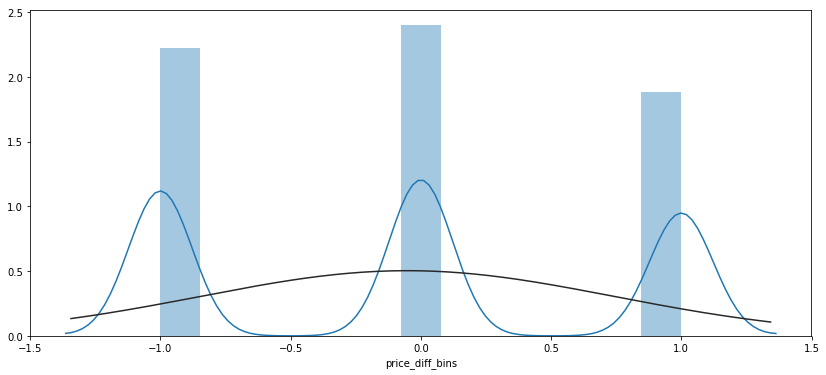

In [232]:
from scipy.stats import norm
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df.price_diff_bins, fit=norm)

### Prep Dataset for Export

In [233]:
df.drop(df.index[0], inplace=True)

In [234]:
df.head()

,price,res_load,temp,wind,gen_total,gen_bio,gen_hyd,gen_windoff,gen_windon,gen_pv,gen_reother,gen_nuc,gen_bcoal,gen_hcoal,gen_gas,gen_pump,gen_other,gen_f_total,gen_f_windoff,gen_f_windon,gen_f_pv,gen_f_other,dm,dm_f,netex,...,merit_inflex,merit_nuc,merit_bcoal,merit_hcoal,merit_gas,merit_ren_flag,merit_inflex_flag,merit_nuc_flag,merit_bcoal_flag,merit_hcoal_flag,merit_gas_flag,merit_import_flag,merit,day,weekend,month,season,hour,peak,lag1,price_change,price_diff,price_diff_pos,price_pos,price_diff_bins
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,-29.99,30129.1,1.1,18273.4,56673.00,4764.50,1676.25,2999.25,30105.50,0.0,147.0,4754.00,6831.00,1209.00,1786.25,738.50,1661.75,252128.0,2925.25,29384.0,0.0,122892.0,43341.75,39459.00,15845.0,...,-5118.75,-6490.50,-9508.50,-11042.75,-12592.75,0,1,0,0,0,0,0,2,0,1,1,1,1,0,-5.27,-4.690702,-24.72,0,0,-1
2018-01-01 02:00:00,-56.65,29368.7,1.0,18114.6,56914.75,4766.75,1672.00,3096.00,30772.75,0.0,146.0,4591.00,6787.25,1260.25,1790.75,441.00,1591.00,252116.0,3011.25,30585.0,0.0,117736.0,42531.00,38436.75,16276.0,...,-6690.50,-7899.25,-10873.50,-12388.25,-13942.75,0,1,0,0,0,0,0,2,0,1,1,1,2,0,-29.99,-0.888963,-26.66,0,0,-1
2018-01-01 03:00:00,-63.14,29008.6,1.0,17948.1,57594.50,4771.00,1658.25,3136.75,31641.50,0.0,146.0,4888.75,6745.75,1246.75,1808.25,5.25,1546.25,254696.0,3061.50,31859.0,0.0,115020.0,41524.25,38260.75,16362.0,...,-8597.25,-10103.75,-13036.50,-14493.00,-16065.00,0,1,0,0,0,0,0,2,0,1,1,1,3,0,-56.65,-0.114563,-6.49,0,0,-1
2018-01-01 04:00:00,-64.62,29538.3,0.9,17782.9,57390.25,4776.50,1654.00,3212.00,31529.00,0.0,146.0,4696.50,6727.75,1244.50,1805.75,6.25,1592.00,257908.0,3202.25,32978.0,0.0,113188.0,41555.25,38562.00,15643.0,...,-8530.25,-9844.50,-12759.25,-14259.25,-15828.75,0,1,0,0,0,0,0,2,0,1,1,1,4,0,-63.14,-0.023440,-1.48,0,0,0
2018-01-01 05:00:00,-67.00,29377.5,0.8,17615.1,58147.00,4768.75,1648.25,3281.50,32063.00,0.0,146.0,4830.75,6746.00,1247.75,1788.25,9.00,1617.75,257716.0,3369.50,33634.0,0.0,109704.0,41743.00,38668.50,15585.0,...,-8932.50,-10381.00,-13314.00,-14843.00,-16395.00,1,0,0,0,0,0,0,1,0,1,1,1,5,0,-64.62,-0.036831,-2.38,0,0,-1


In [235]:
df.describe()

,price,res_load,temp,wind,gen_total,gen_bio,gen_hyd,gen_windoff,gen_windon,gen_pv,gen_reother,gen_nuc,gen_bcoal,gen_hcoal,gen_gas,gen_pump,gen_other,gen_f_total,gen_f_windoff,gen_f_windon,gen_f_pv,gen_f_other,dm,dm_f,netex,...,merit_inflex,merit_nuc,merit_bcoal,merit_hcoal,merit_gas,merit_ren_flag,merit_inflex_flag,merit_nuc_flag,merit_bcoal_flag,merit_hcoal_flag,merit_gas_flag,merit_import_flag,merit,day,weekend,month,season,hour,peak,lag1,price_change,price_diff,price_diff_pos,price_pos,price_diff_bins
count,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,...,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000
mean,41.476492,42734.948150,10.338638,12890.589052,59864.501372,4623.546847,1796.076103,2370.205009,10543.361659,5056.684861,152.417862,8090.614778,13309.096407,6712.995056,4368.027057,1081.998784,1759.476951,259994.497411,2410.813861,10419.684829,4984.487587,188740.033685,56754.001450,55398.239926,5004.971555,...,23443.709110,18735.344333,9239.247926,2103.275919,-2028.501138,0.001684,0.029256,0.032999,0.104859,0.216081,0.248643,0.366477,5.716237,2.991205,0.308340,6.067058,2.504834,11.500717,0.500031,41.473826,0.361100,0.002666,0.450190,0.450190,-0.052087
std,17.134838,8879.166272,6.616970,4049.001982,10666.256376,254.117384,331.212464,1551.220284,8342.036814,7436.572942,31.167214,1187.713293,3293.069099,4673.990366,2061.715376,1316.366230,542.527499,55362.138052,1529.839155,8140.704816,7373.586427,39844.010777,9925.325313,9384.898803,5165.988325,...,11627.449317,11319.226714,9157.655249,6587.347126,5807.186929,0.041006,0.168528,0.178638,0.306382,0.411583,0.432240,0.481857,1.314827,2.000714,0.461822,3.236074,1.071649,6.922022,0.500016,17.138786,36.119960,5.301554,0.497528,0.497528,0.792806
min,-90.010000,16659.600000,0.200000,7371.100000,30873.250000,3714.000000,937.000000,0.000000,188.750000,0.000000,107.000000,3382.250000,3813.000000,447.000000,236.250000,0.000000,889.500000,108356.000000,27.000000,316.000000,0.000000,82413.000000,33979.000000,33358.750000,-12614.000000,...,-12065.500000,-16533.750000,-22680.750000,-25765.250000,-29258.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-90.010000,-1153.333333,-49.650000,0.000000,0.000000,-1.000000
25%,32.800000,37193.000000,3.900000,8909.600000,51997.750000,4441.000000,1535.500000,962.250000,4252.125000,0.000000,131.000000,7518.750000,11296.750000,2665.875000,2678.500000,195.250000,1479.000000,217772.000000,1022.000000,4361.375000,0.000000,158948.000000,48493.375000,47628.750000,1313.000000,...,15923.125000,11261.750000,2626.750000,-2595.500000,-6145.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,3.000000,2.000000,6.000000,0.000000,32.800000,-0.060141,-2.490000,0.000000,0.000000,-1.000000
50%,41.670000,41943.900000,10.600000,12267.900000,60010.750000,4666.000000,1790.750000,2264.750000,8002.000000,252.000000,143.000000,7996.750000,14340.000000,5538.750000,4107.000000,493.000000,1663.250000,258968.000000,2291.000000,8045.750000,239.000000,188360.000000,56447.000000,55154.750000,5304.000000,...,24036.250000,19352.250000,9042.500000,1995.250000,-2099.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.000000,6.000000,3.000000,12.000000,1.000000,41.670000,-0.007418,-0.290000,0.000000,0.000000,0.000000
75%,50.865000,49257.950000,15.600000,16750.600000,68029.125000,4

### Extract Data

In [236]:
df.to_csv('dataset_clean.csv')

In [237]:

# get einsman event data

# get DA prices
# create target variable ( event of grid stability serice)
# other events???

# k mean clustering mustererkennung

